In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use("bmh")
import seaborn as sns
sns.set()
sns.set_palette("GnBu_d")
from datetime import datetime, timedelta, date, time
import urllib
import json
import ssl
import pickle
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_LA = pd.read_csv('data/LA.csv')
df_LA

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00,0.750000
...,...,...,...,...,...,...,...,...,...,...
306865,2018-12-31 23:46:00,2018-12-31 23:55:00,3069,3069,6222,Walk-up,Broadway & 3rd,Broadway & 3rd,0 days 00:09:00,0.150000
306866,2018-12-31 23:47:00,2018-12-31 23:54:00,3069,3069,5730,Walk-up,Broadway & 3rd,Broadway & 3rd,0 days 00:07:00,0.116667
306867,2018-12-31 23:51:00,2019-01-01 01:28:00,4211,4210,12347,Walk-up,Pacific & North Venice,Ocean Front Walk & North Venice,0 days 01:37:00,1.616667
306868,2018-12-31 23:54:00,2019-01-01 00:22:00,3005,3082,12128,Walk-up,7th & Flower,Traction & Rose,0 days 00:28:00,0.466667


In [6]:
df_LA = df_LA.assign(start_time=pd.to_datetime(df_LA['start_time']))
df_LA = df_LA.assign(end_time=pd.to_datetime(df_LA['end_time']))
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306870 entries, 0 to 306869
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   start_time              306870 non-null  datetime64[ns]
 1   end_time                306870 non-null  datetime64[ns]
 2   start_station_id        306870 non-null  int64         
 3   end_station_id          306870 non-null  int64         
 4   bike_id                 306870 non-null  int64         
 5   user_type               306870 non-null  object        
 6   start_station_name      306870 non-null  object        
 7   end_station_name        306870 non-null  object        
 8   trip_duration           306870 non-null  object        
 9   trip_duration_in_hours  306870 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 23.4+ MB


In [13]:
df_start_time=df_LA.set_index("start_time")
df_end_time=df_LA.set_index("end_time")
df_start_time = df_start_time['bike_id'].resample("H").nunique()
df_end_time = df_end_time['bike_id'].resample("H").nunique()

In [14]:
df_end_time.count()

8762

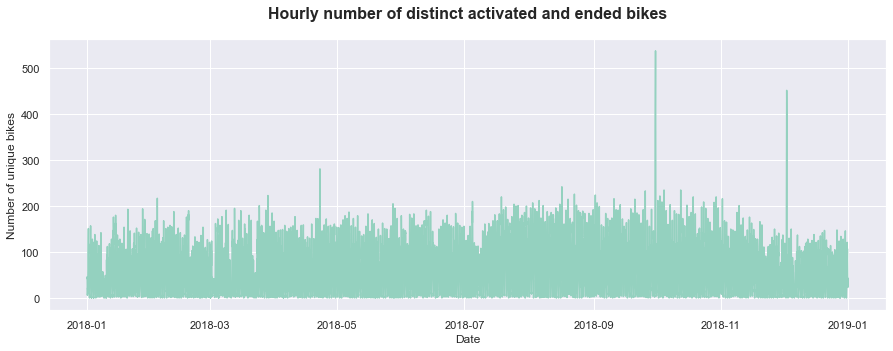

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Hourly number of distinct activated and ended bikes", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Date")
ax.set_ylabel("Number of unique bikes")

ax.plot(df_start_time + df_end_time)
plt.show()

In [17]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306870 entries, 0 to 306869
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   start_time              306870 non-null  datetime64[ns]
 1   end_time                306870 non-null  datetime64[ns]
 2   start_station_id        306870 non-null  int64         
 3   end_station_id          306870 non-null  int64         
 4   bike_id                 306870 non-null  int64         
 5   user_type               306870 non-null  object        
 6   start_station_name      306870 non-null  object        
 7   end_station_name        306870 non-null  object        
 8   trip_duration           306870 non-null  object        
 9   trip_duration_in_hours  306870 non-null  float64       
 10  start_hour              306870 non-null  int64         
 11  start_day               306870 non-null  object        
 12  end_hour                306870

In [18]:
df_LA['start_hour'] = df_LA['start_time'].dt.hour
df_LA['start_day'] = df_LA['start_time'].dt.date

df_LA['end_hour'] = df_LA['end_time'].dt.hour
df_LA['end_day'] = df_LA['end_time'].dt.date

       start_day  start_hour  anzahl
0     2018-01-01           0      42
1     2018-01-01           1      46
2     2018-01-01           2      29
3     2018-01-01           3       6
4     2018-01-01           4       9
...          ...         ...     ...
8364  2018-12-31          19      37
8365  2018-12-31          20      23
8366  2018-12-31          21      43
8367  2018-12-31          22      41
8368  2018-12-31          23      36

[8369 rows x 3 columns]


Text(0, 0.5, 'Number of unique bikes')

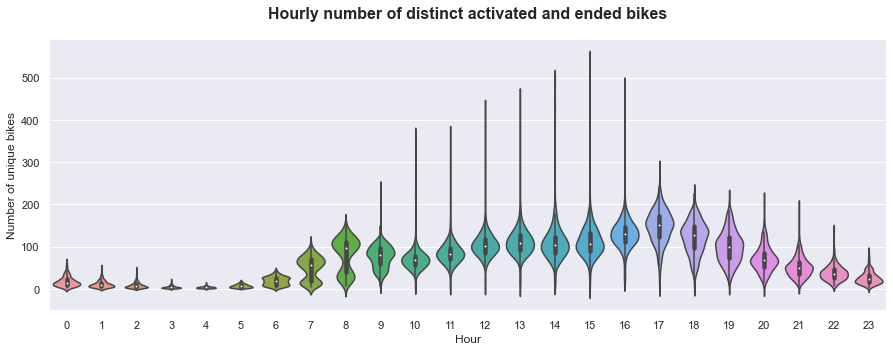

In [33]:
act_bikes = df_LA.groupby(['start_day', 'start_hour'])['bike_id'].nunique().reset_index()
end_bikes = df_LA.groupby(['end_day', 'end_hour'])['bike_id'].nunique().reset_index()

merged = act_bikes.merge(end_bikes, left_on=['start_day', 'start_hour'], right_on=['end_day', 'end_hour'], how='inner')
merged['anzahl'] = merged.bike_id_x + merged.bike_id_y

result = merged.drop(['bike_id_x', 'bike_id_y', 'end_day', 'end_hour'], axis=1)
print(result)

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(
    x=result['start_hour'],
    y=result['anzahl'],
    scale="count")

ax.set_title("Hourly number of distinct activated and ended bikes", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Hour")
ax.set_ylabel("Number of unique bikes")

In [34]:
result['start_hour']

0        0
1        1
2        2
3        3
4        4
        ..
8364    19
8365    20
8366    21
8367    22
8368    23
Name: start_hour, Length: 8369, dtype: int64